In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive


Mounted at /gdrive
/gdrive


# 1. Extracting data and cleaning:

In [ ]:
df = pd.read_csv( r'/gdrive/My Drive/CCGENERAL.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

There are a **few null values**, lets confirm that:

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are very few null values in credit limit and minimum payments column. Lets impute these values later.

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


There are values in **different numerical ranges** which will be normalized later.

In [ ]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


**Cust_ID** is one column which we will not be needing for model building, so lets **drop** it:

In [ ]:
df = df.drop(['CUST_ID'],axis = 1)
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


# 2. Data Visualization :

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1 Univariate Analysis :

Let's first identify the **distribution** of each column :

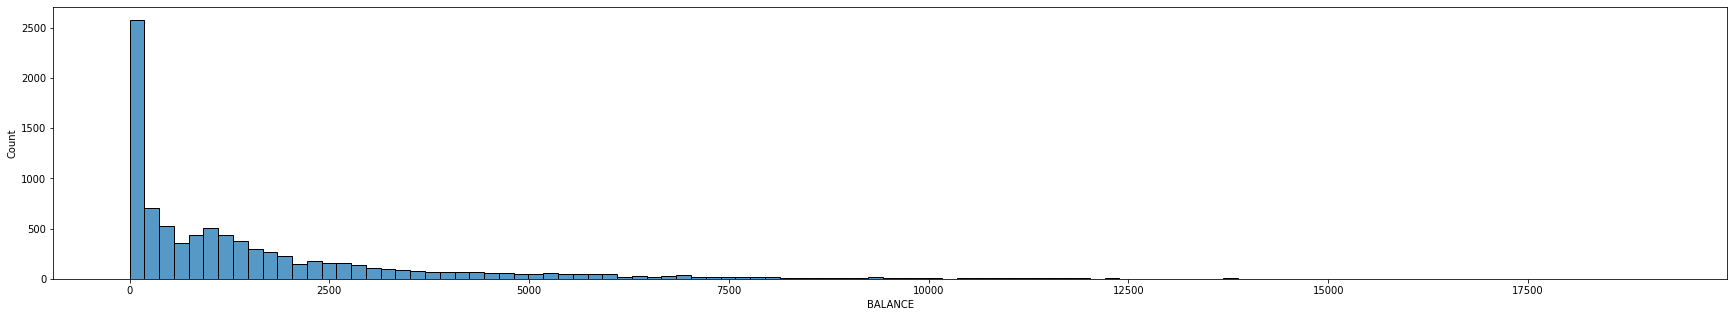

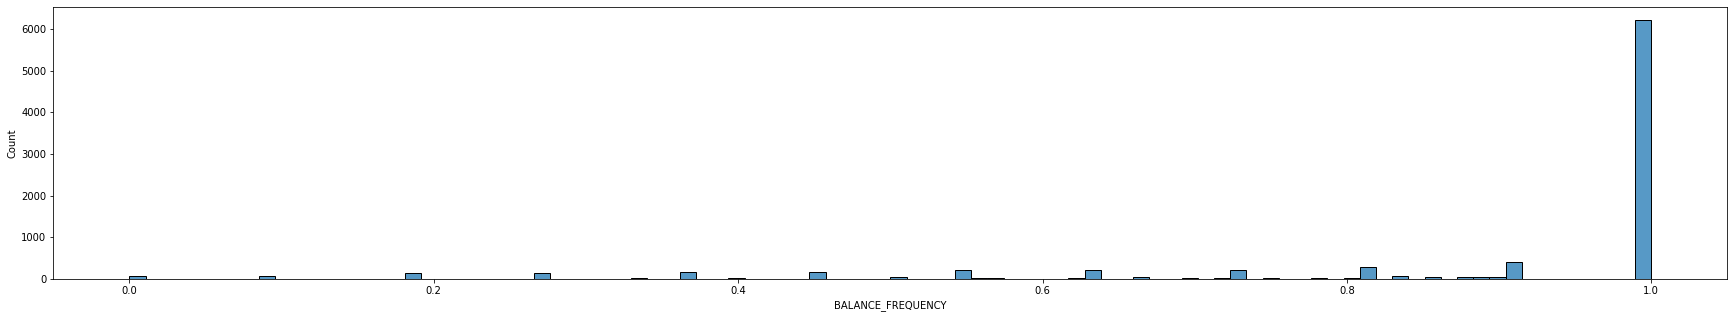

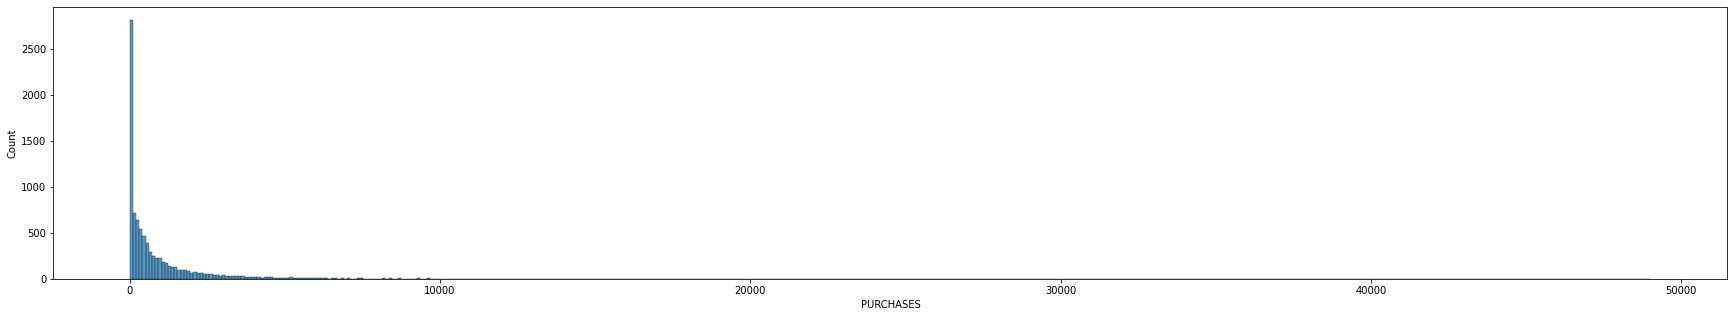

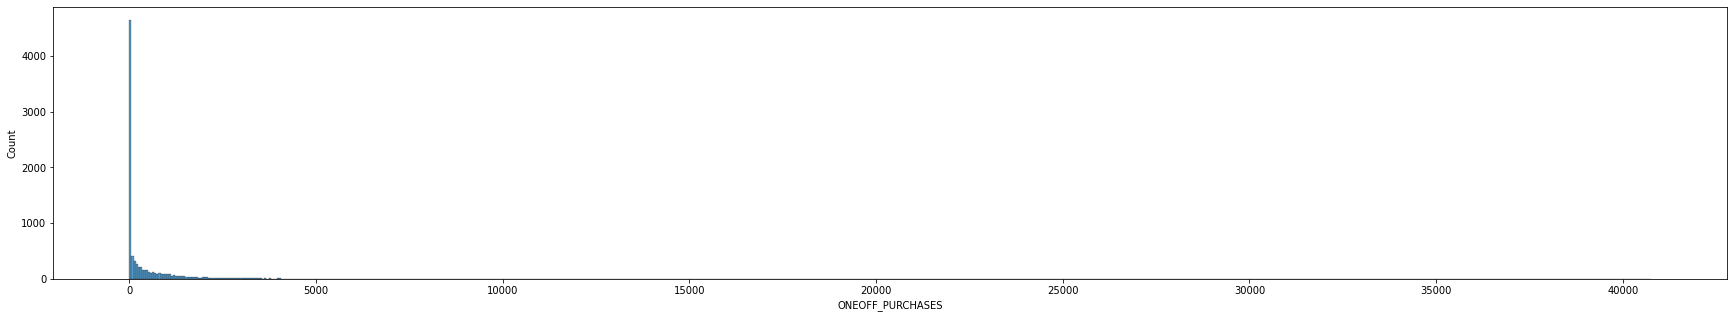

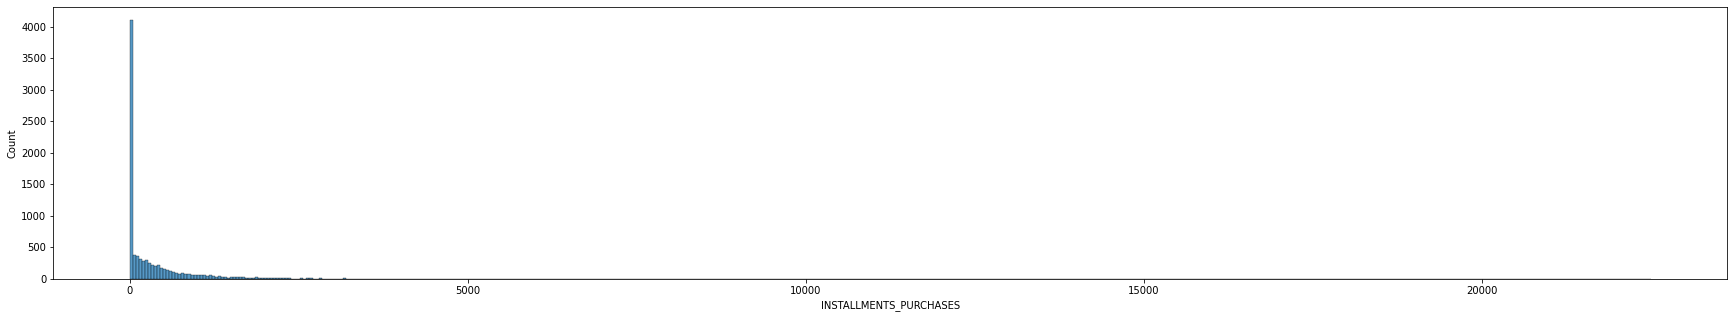

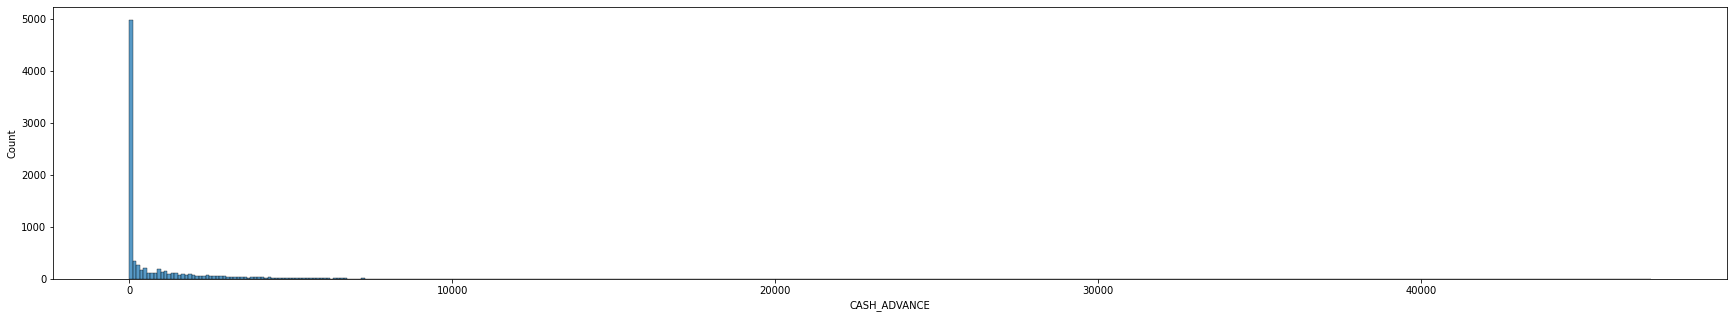

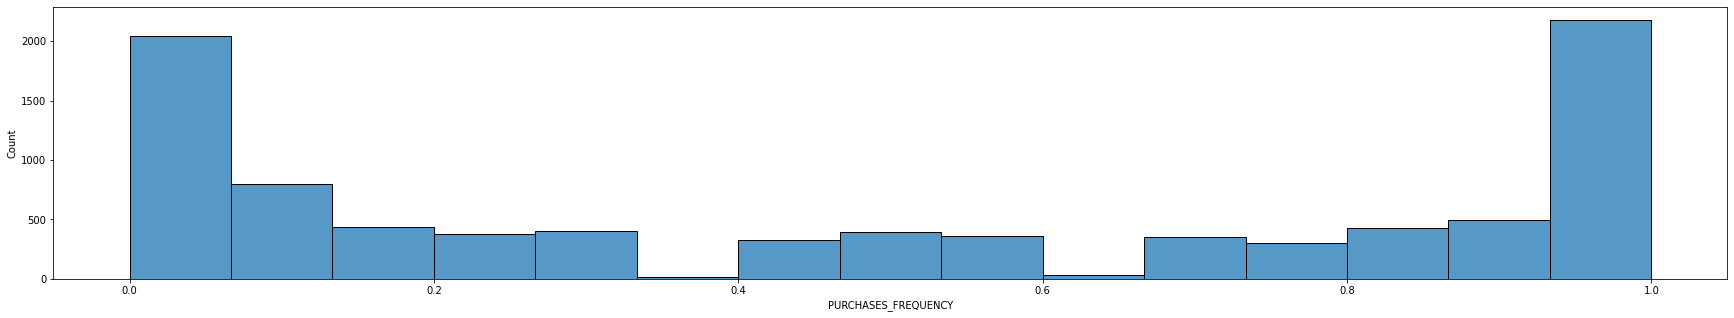

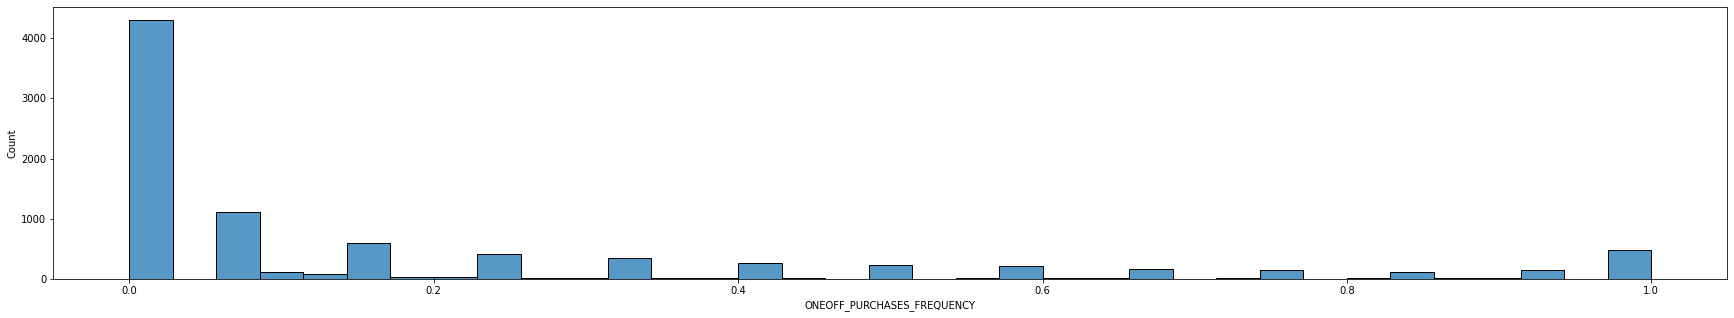

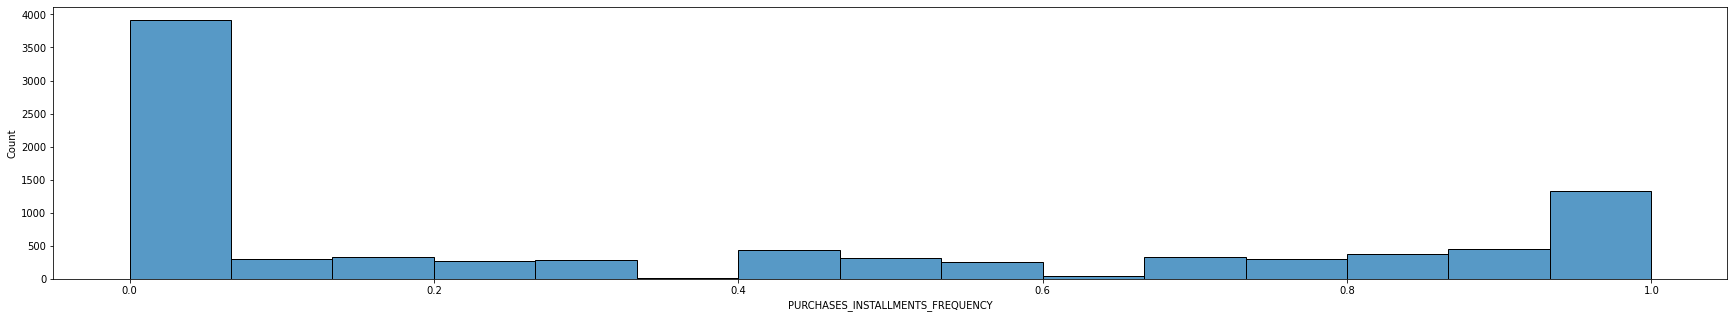

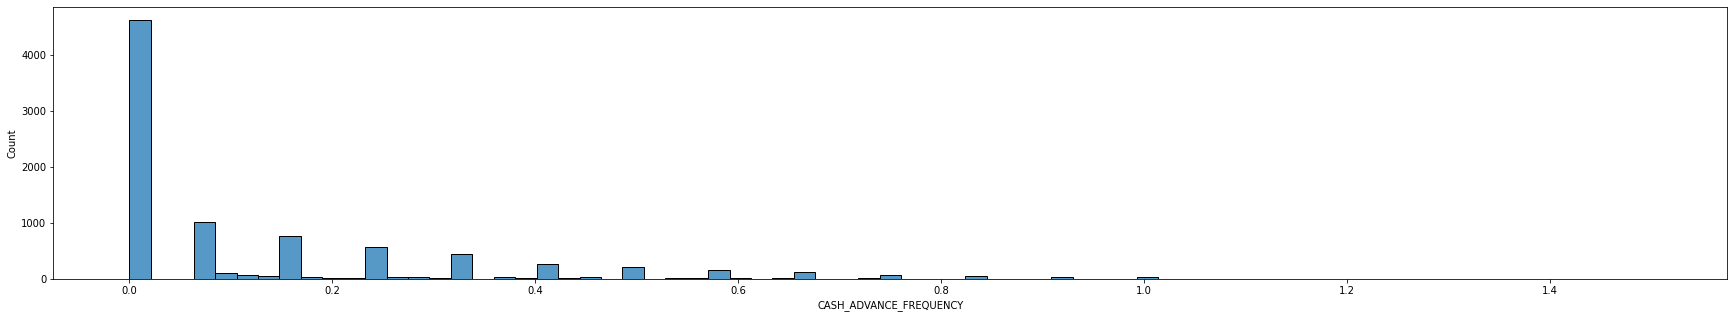

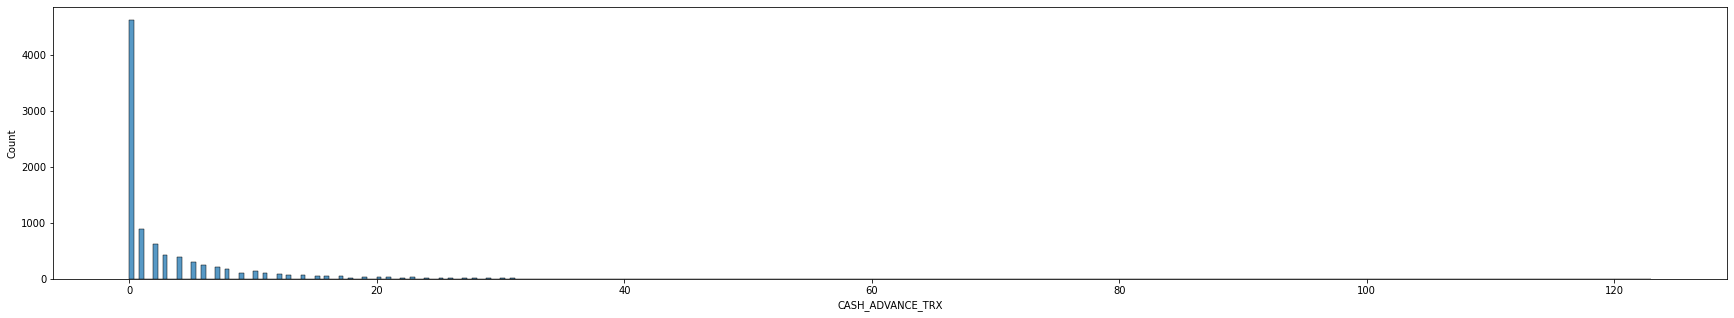

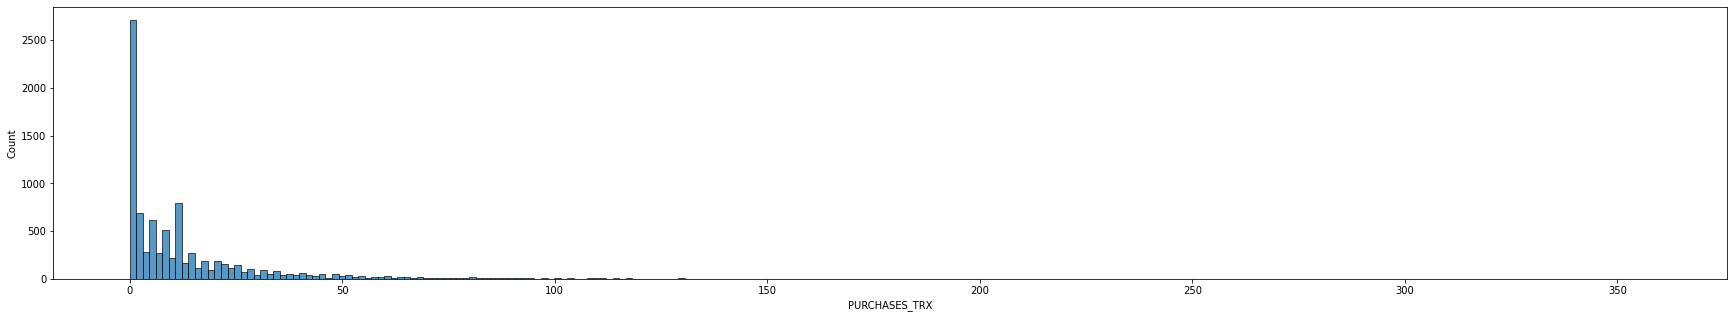

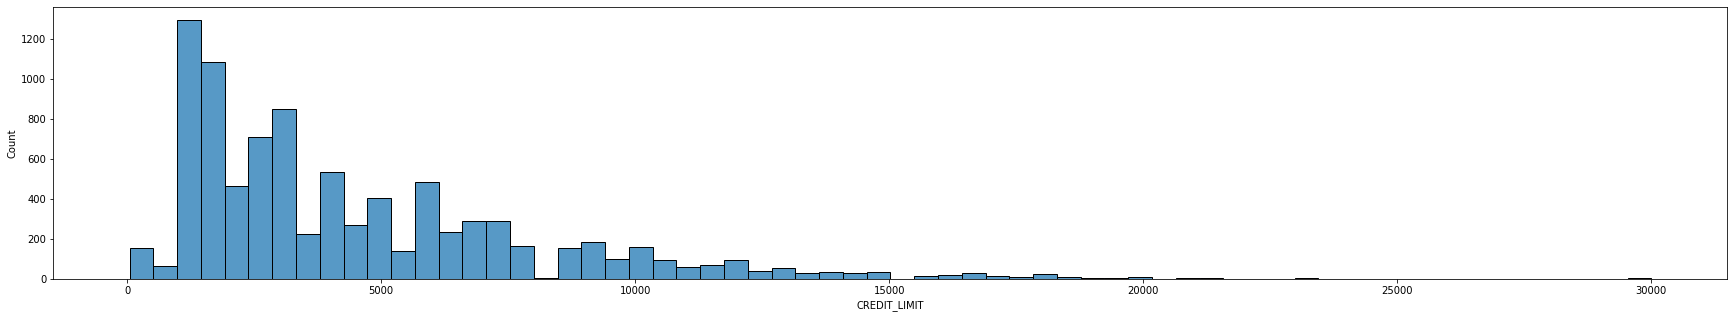

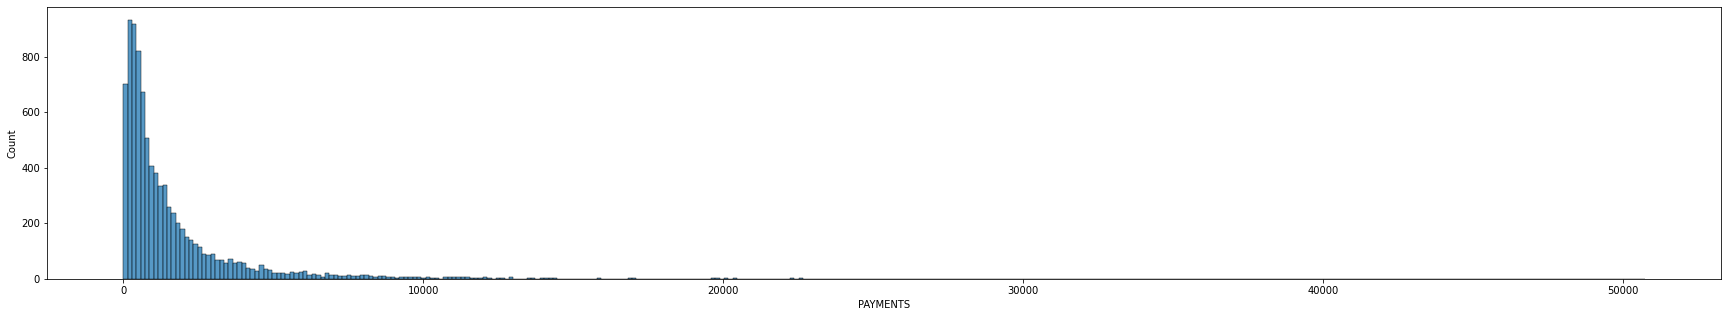

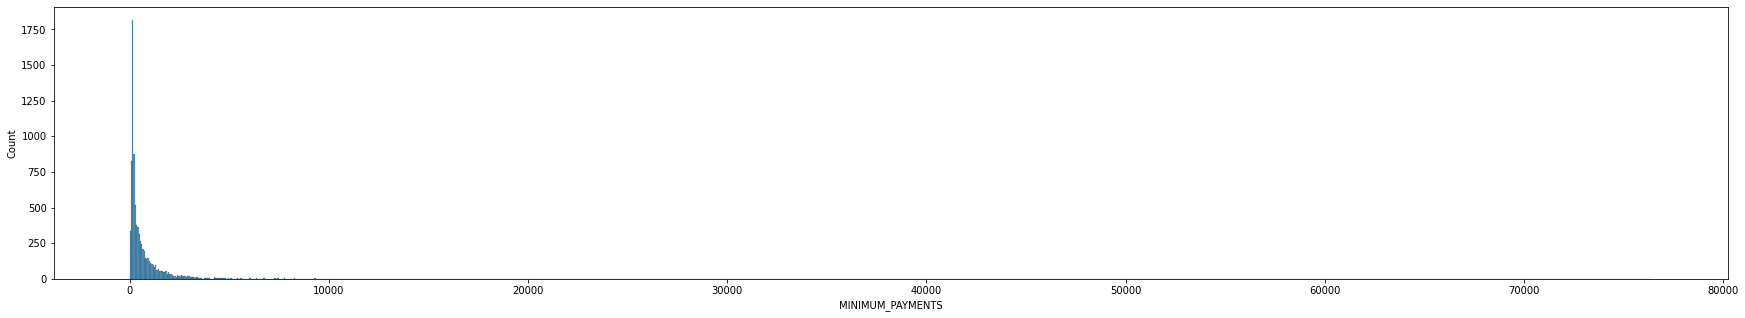

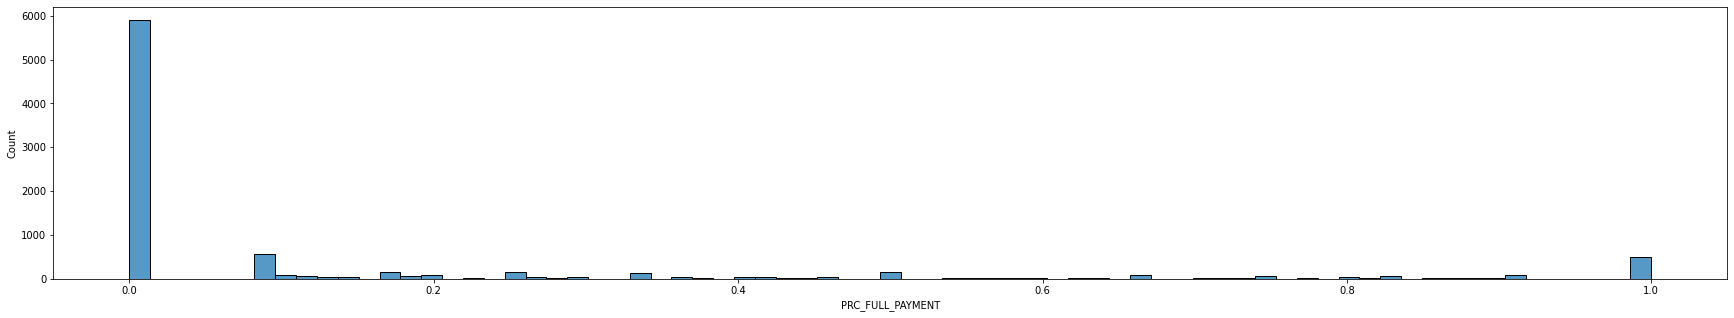

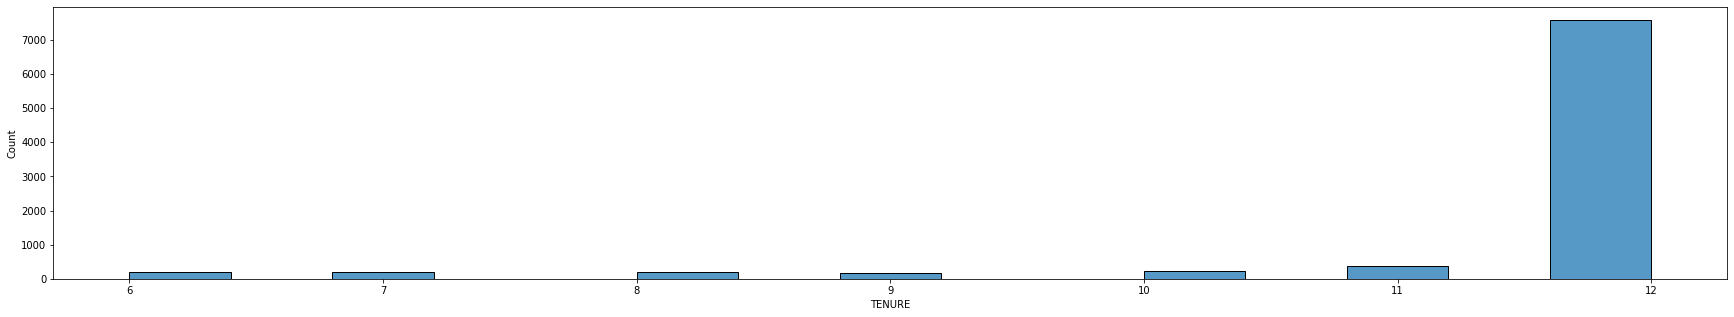

In [ ]:
for column in df.columns:
    plt.figure(figsize = (30,5))
    sns.histplot(df[column])
    plt.show()

**We observe the following trends here :**
<ol>
    <li>Most credit card holders have low credit limit and maintain credit balance below 7500</li>
    <li>Variable such as Purchases, OneOffPurchases, installmentpurchases and cash advances also follow the same trend as credit balance. They could all be related. That is as the credit balance is low, the purchases are also low and so on</li>
    <li>Most people either don't purchase anything or they purchase very frequently</li>
    <li>People who purchase in installments is more than people who purchase in one-go</li>
    <li>In the last 6 months, most people have made total payments below 10000, with the minimum payments below 5000</li>
    <li>Finally, most of the credit card holders own a card for more than 12 months</li>
</ol>
</br>

**We can validate some of these trends further in bivariate analysis.**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


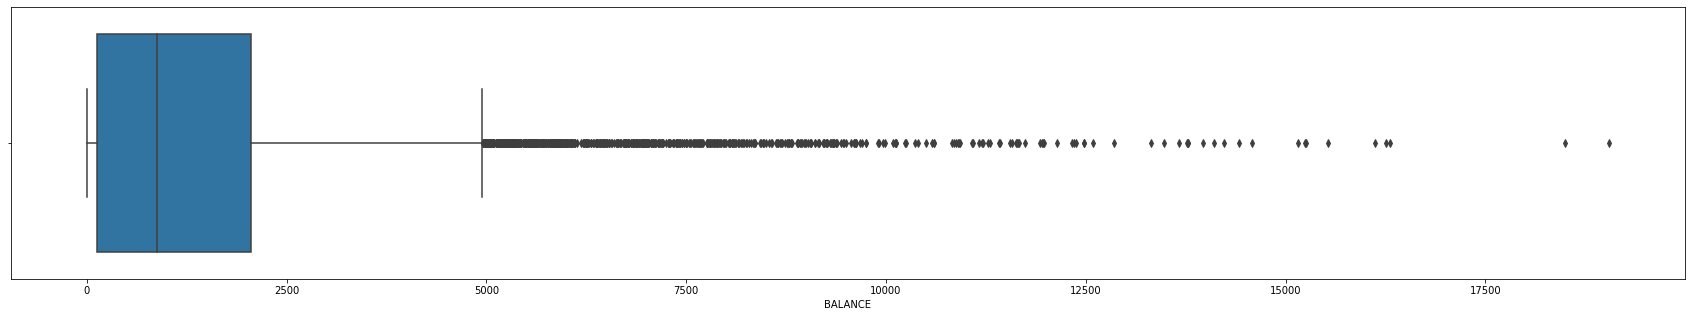

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


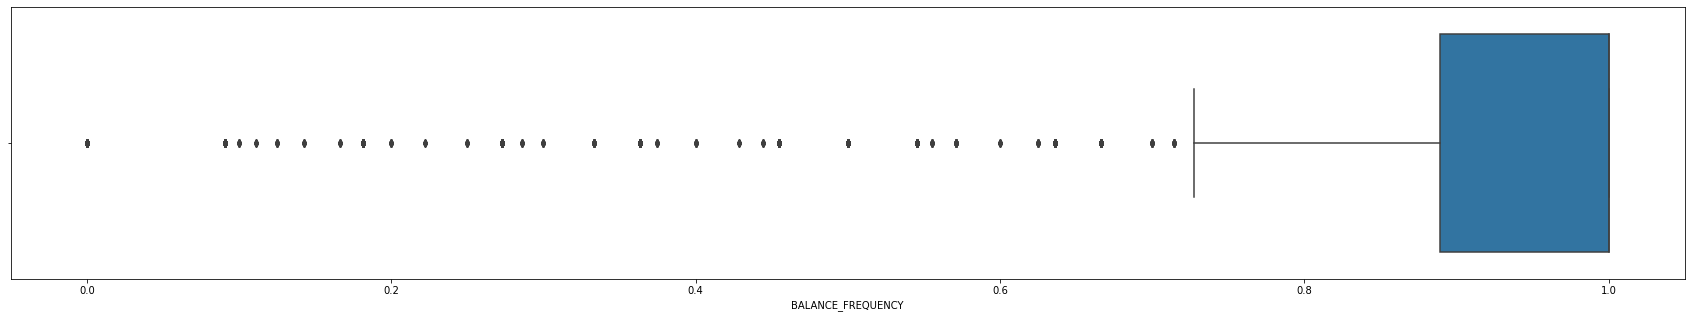

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


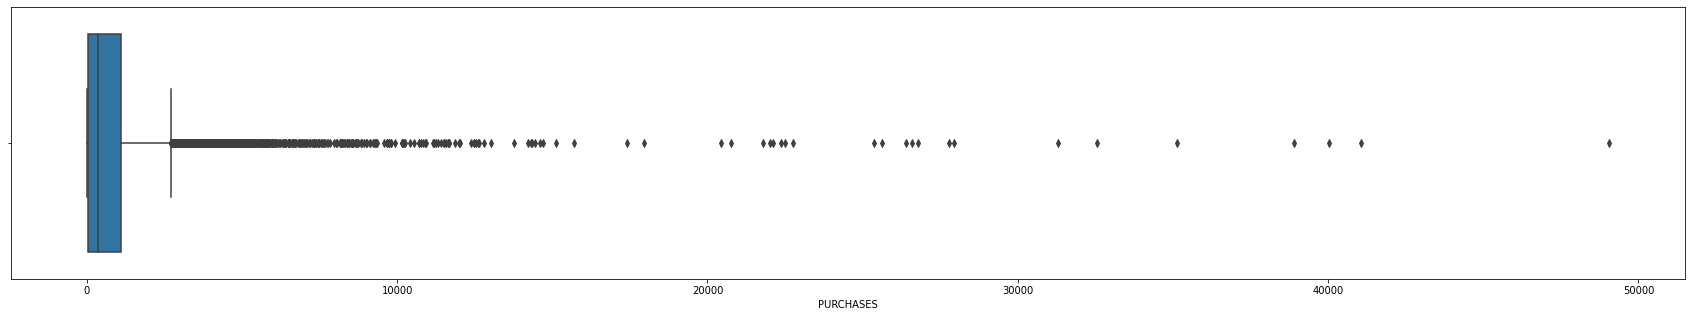

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


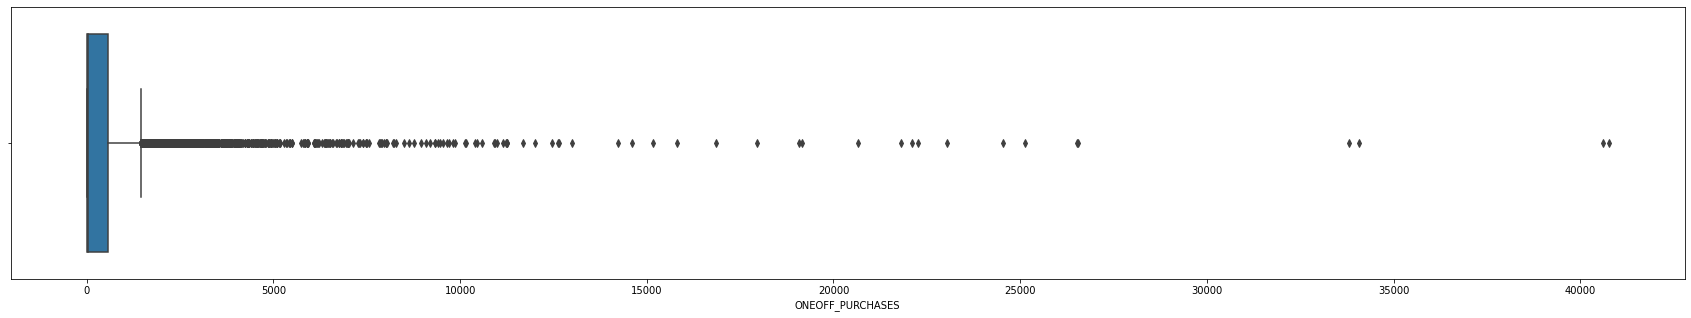

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


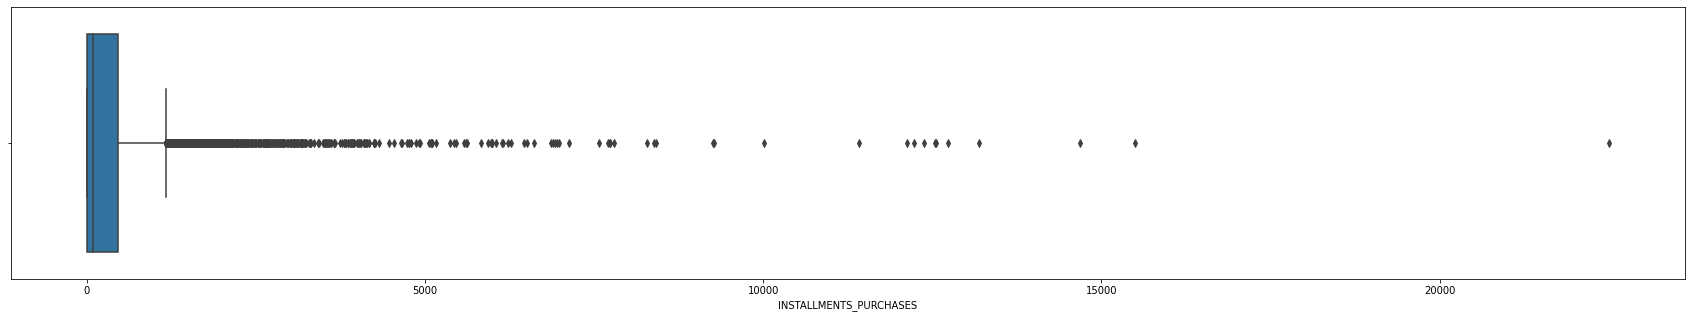

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


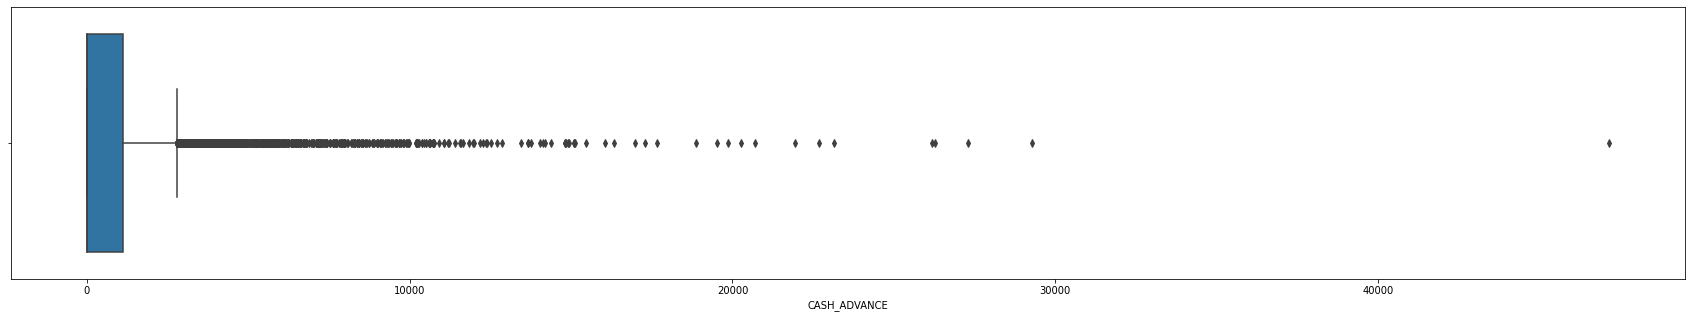

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


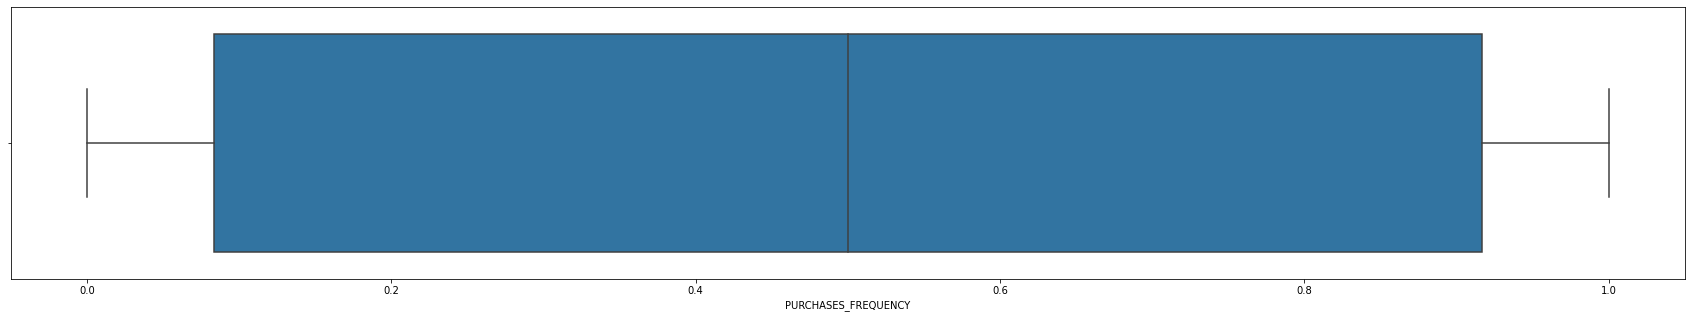

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


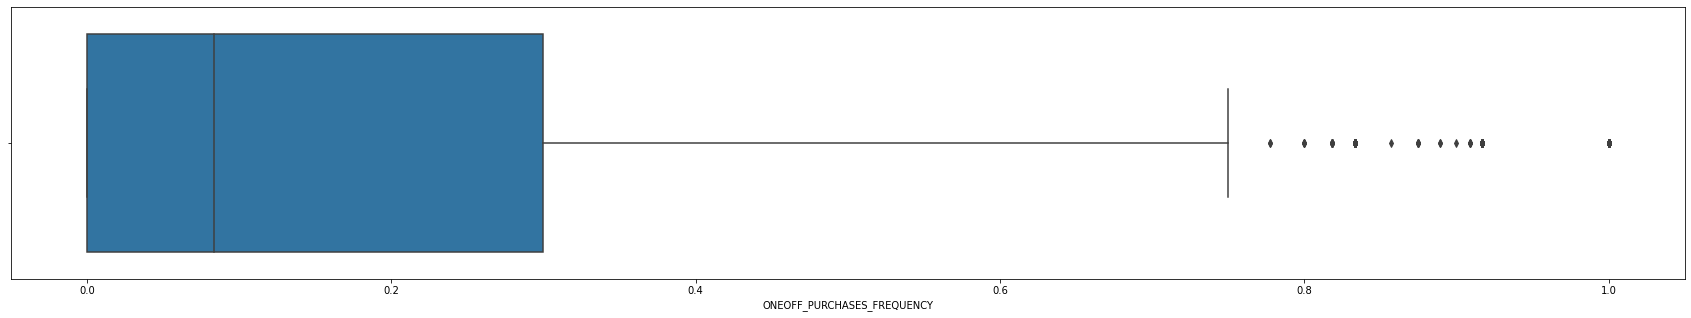

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


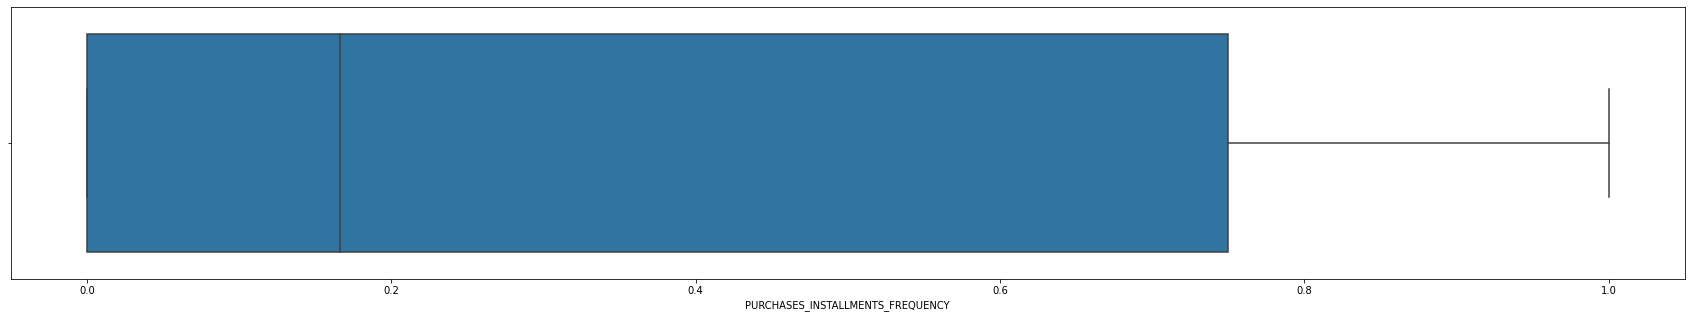

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


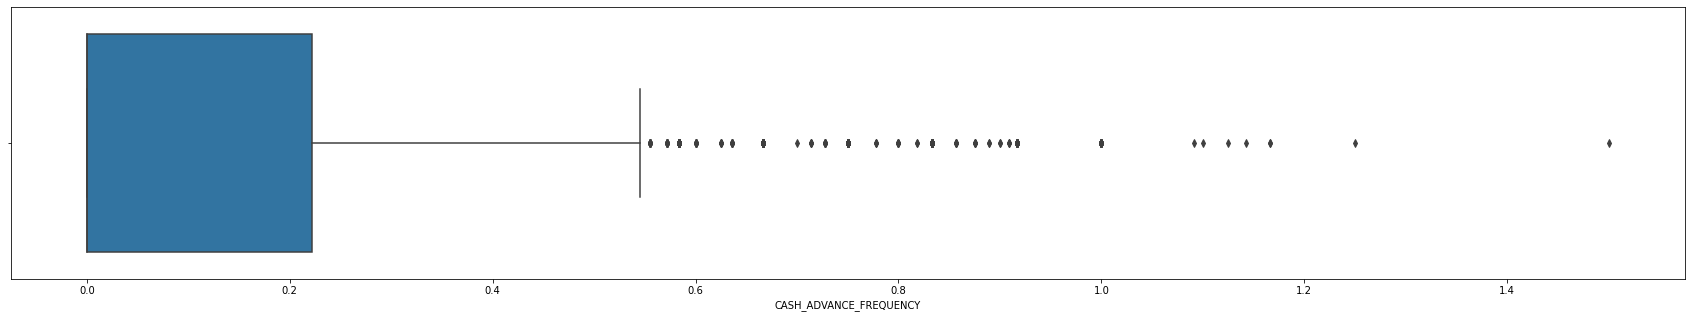

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


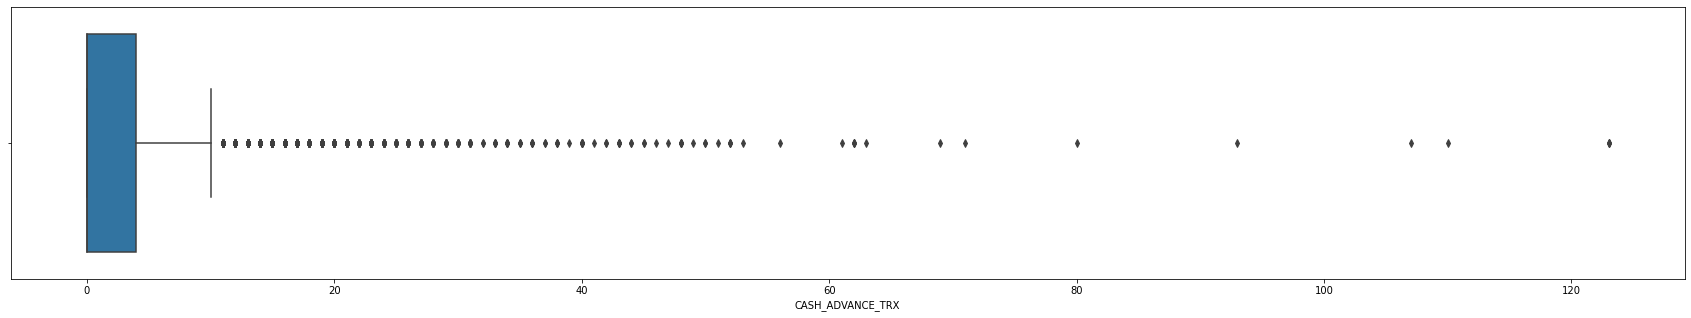

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


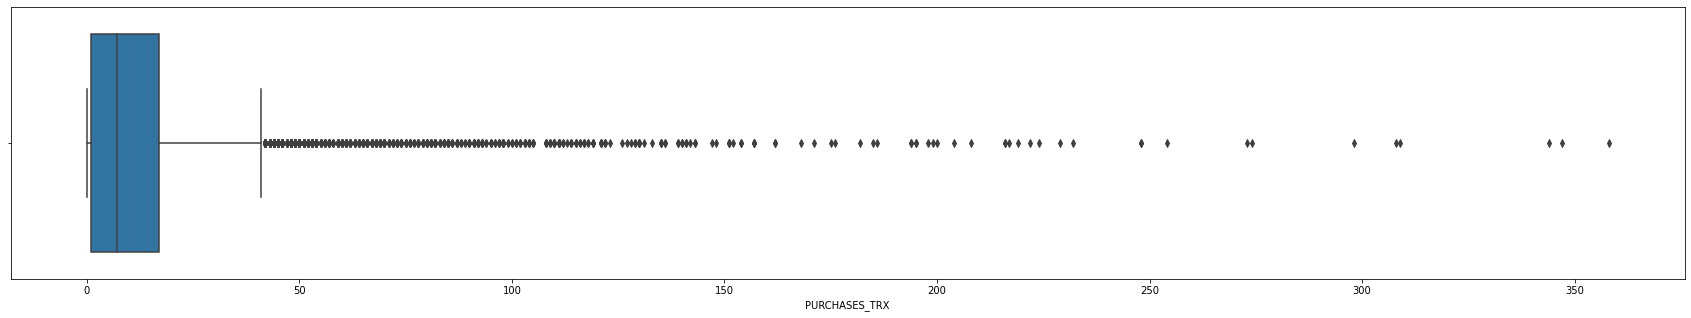

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


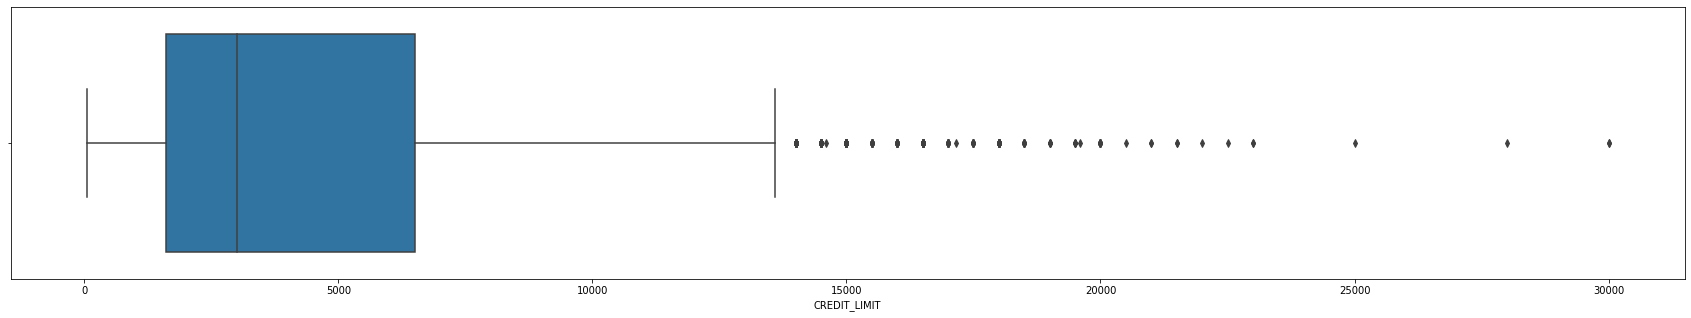

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


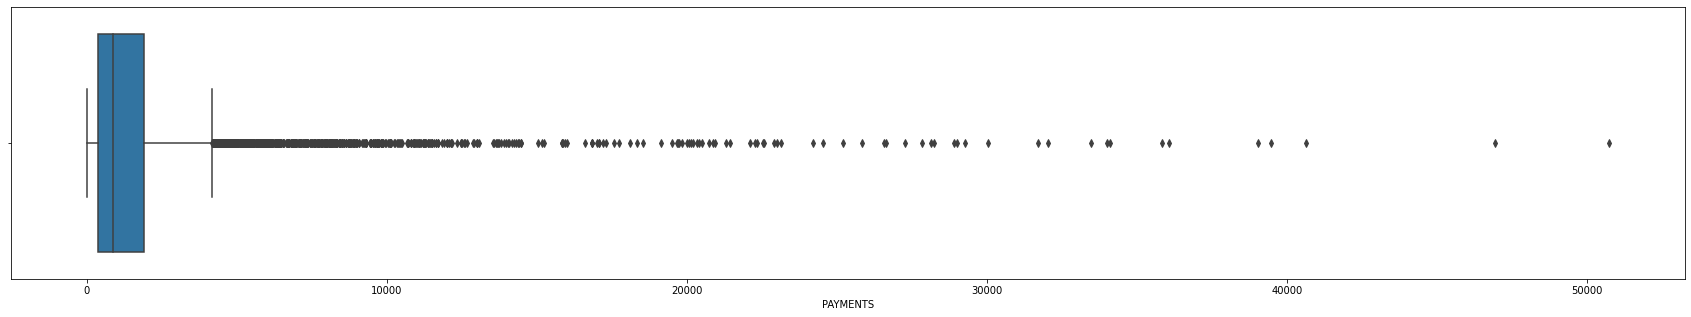

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


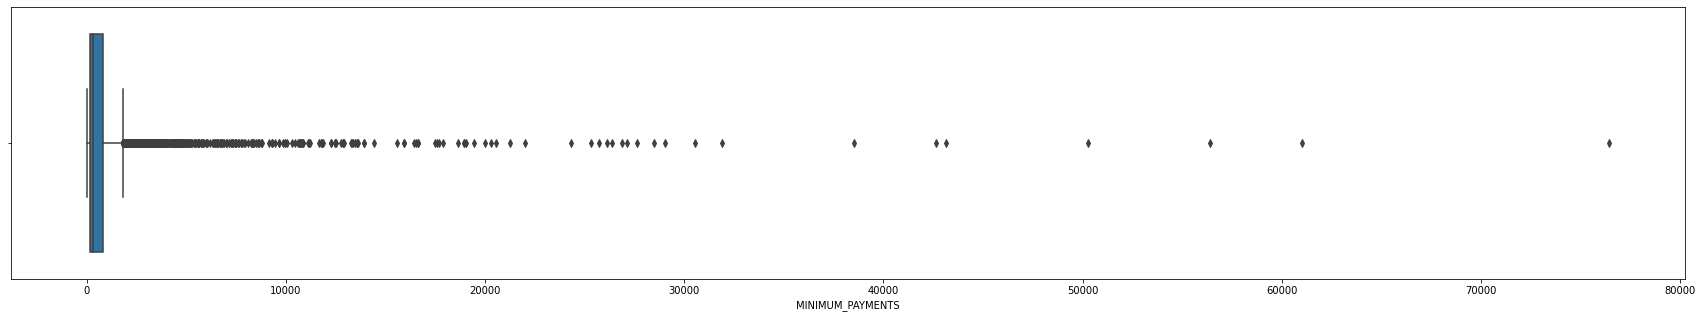

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


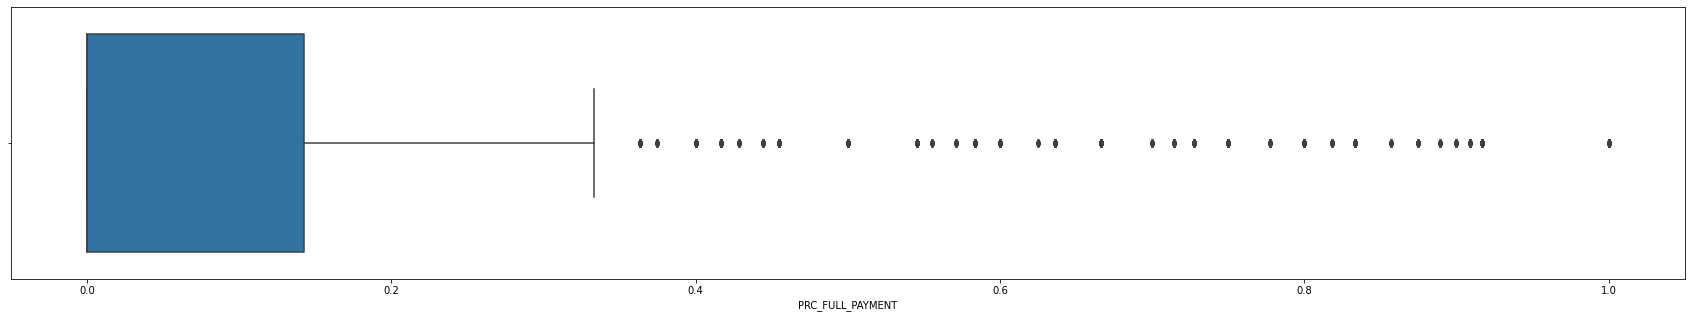

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


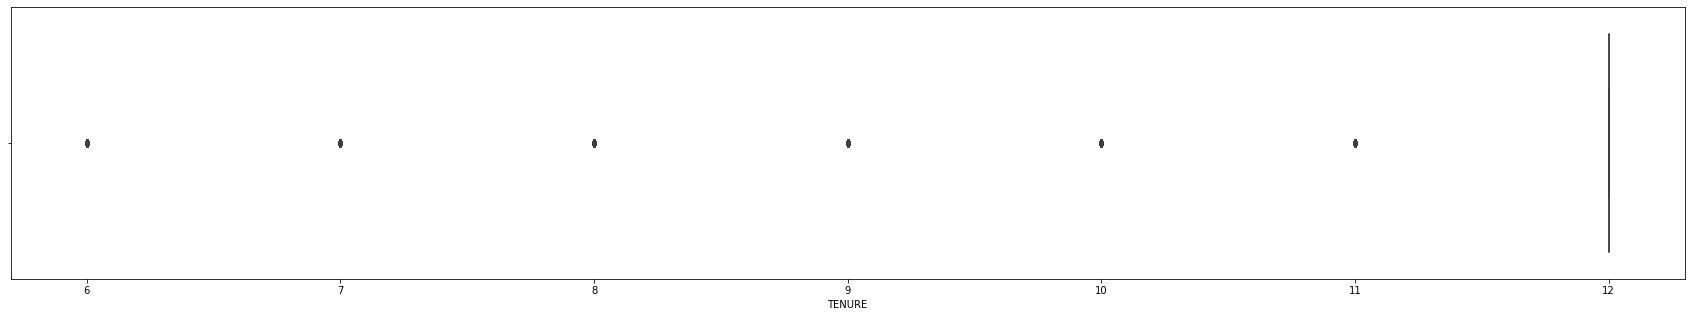

In [ ]:
for column in df.columns:
    plt.figure(figsize = (30,5))
    sns.boxplot(df[column])
    plt.show()

We observe a lot of outliers here, hence **deleting these outliers is not recommended**. We could have deleted the outlier points if the number of outliers are less. Here, we will avoid deleting the outlier records. What we can do here based on column description is to normalize the data and **handle the skewness using log tranformations or power transformers**.

One more thing to observe here is minimum payments column also contains a lot of outliers, so lets impute the null values with median. You can also delete the records with null values and proceed since, the number of records with null values are small. There is no thumbrule for handling null values or outliers.

**Imputing null values :**

In [ ]:
#imputing with median values using sklearn.impute
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

X = df['MINIMUM_PAYMENTS'].values.reshape(-1,1)
X = imputer.fit_transform(X) 

df['MINIMUM_PAYMENTS_NEW'] = X

In [ ]:
X2 = df['CREDIT_LIMIT'].values.reshape(-1,1)
X2 = imputer.fit_transform(X2) 

df['CREDIT_LIMIT_NEW'] = X2

In [ ]:
df = df.drop(['CREDIT_LIMIT','MINIMUM_PAYMENTS'],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  PAYMEN

In [ ]:
df.isnull().sum().sum()

0

We have removed all the null values from the dataset.

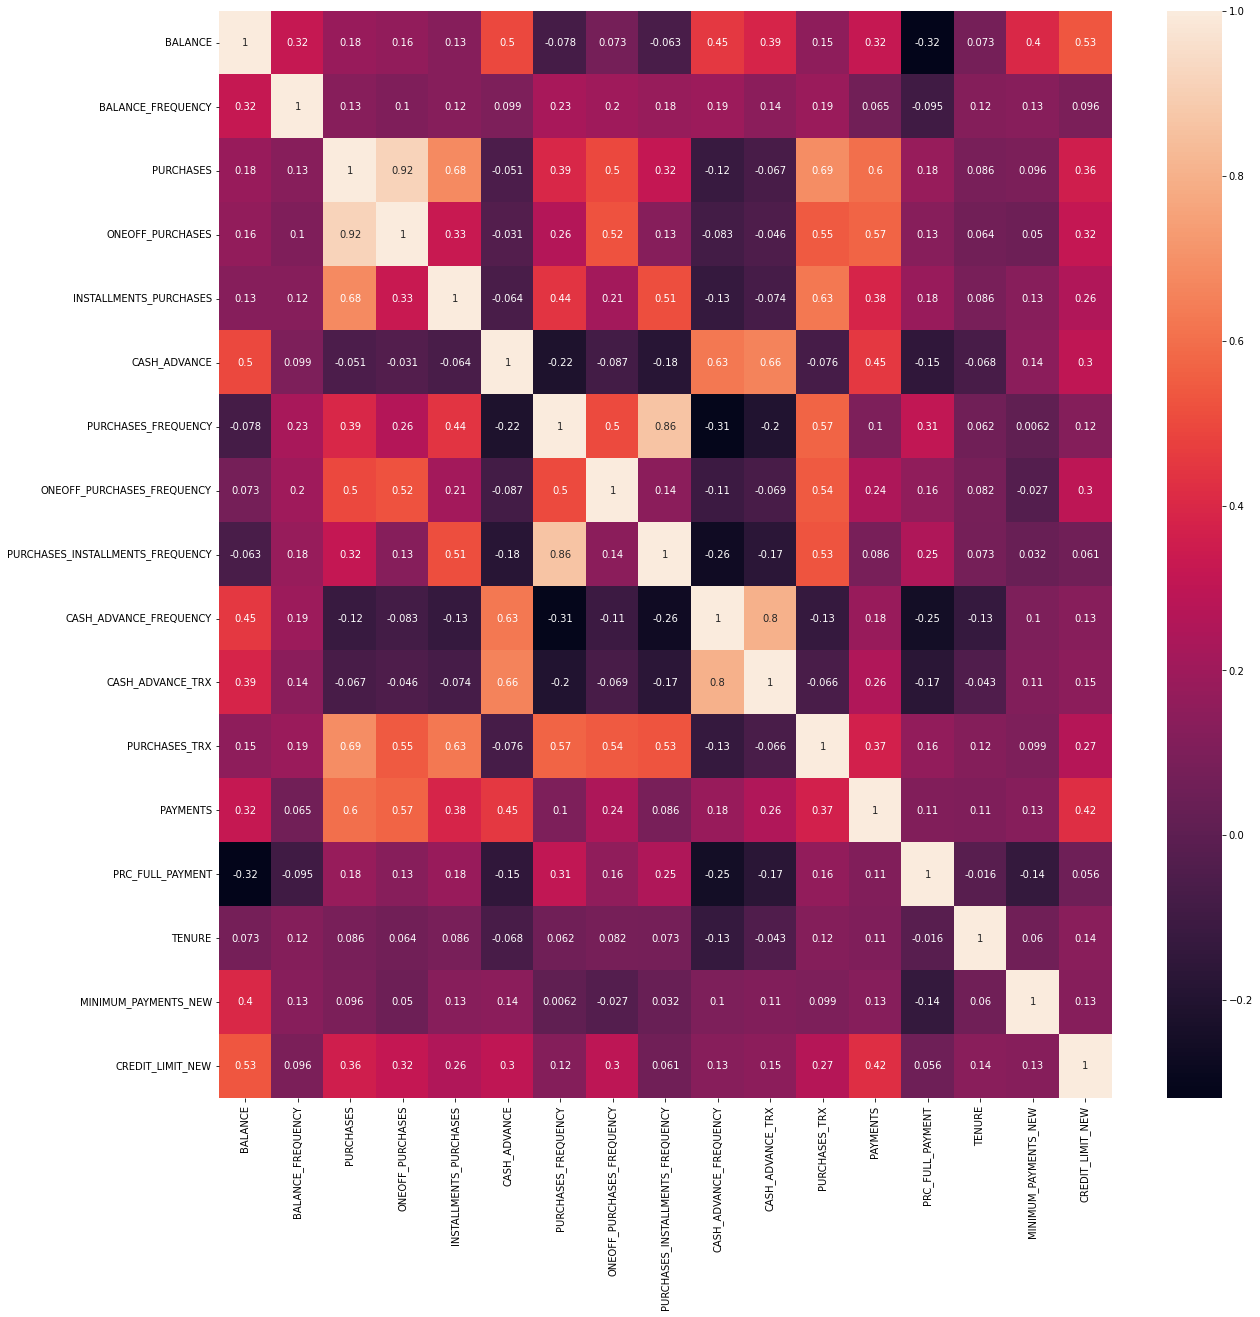

In [ ]:
plt.figure(figsize=(20,20))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

**We can observe and validate few observations here:**
<ol>
    <li>Purchases,oneoffpurchases and investment purchases are highly correlated. That is most of the purchases are oneoffpurchases</li>
    <li>People dont make full payments when the balance is high</li>
    <li>Purchase frequency and cash advance frequency are inversely correlated. That is as the purchase frequency is high, the number of times cash is paid in advance is less and vice-versa</li>
</ol>
    

# 3. Model Building :

In [ ]:
train_df = df

# 3.2 K-MEANS :

In [ ]:
from sklearn.cluster import KMeans

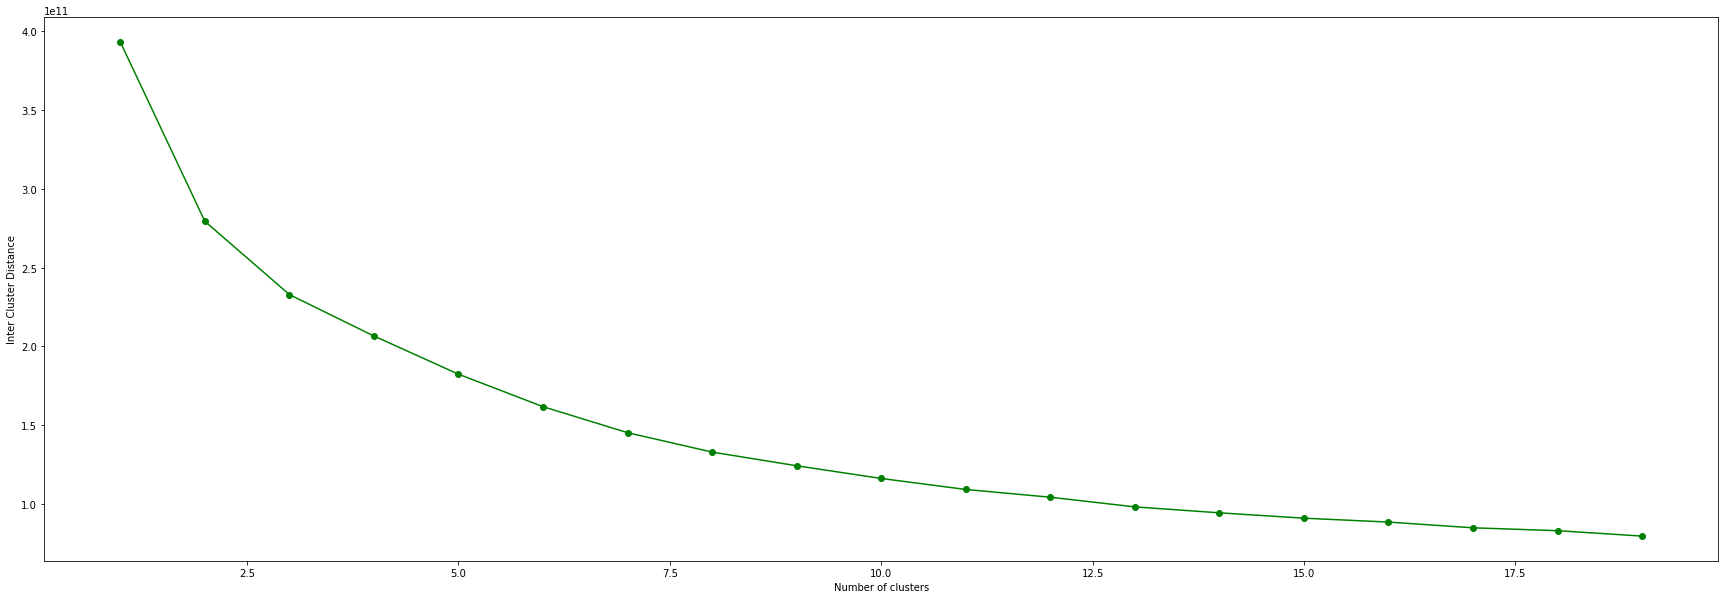

In [ ]:
interclusterdistance = []

for clusters in range(1,20):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=42)
    km.fit(train_df)
    interclusterdistance.append(km.inertia_)
    
#plotting the values
plt.figure(figsize=(30,10))
plt.plot(range(1, 20), interclusterdistance, marker='o', color='g')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()

We observe that till k = 3 the inter cluster distance decreases significantly. Post that it decreases slightly. Lets form 3 clusters and display them:

In [ ]:
km = KMeans(n_clusters = 3,init ='k-means++', max_iter=300,random_state=42)
km.fit(train_df)
y_pred = km.predict(train_df)

In [ ]:
cluster_df = pd.DataFrame(train_df,columns = df.columns)
cluster_df['clusters'] = y_pred
cluster_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS_NEW,CREDIT_LIMIT_NEW,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,201.802084,0.000000,12,139.509787,1000.0,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4103.032597,0.222222,12,1072.340217,7000.0,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,622.066742,0.000000,12,627.284787,7500.0,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,0.000000,12,312.343947,7500.0,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,678.334763,0.000000,12,244.791237,1200.0,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1400.057770,0.000000,12,2407.246035,1800.0,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,6354.314328,1.000000,12,198.065894,13500.0,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,679.065082,0.000000,12,532.033990,2300.0,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,688.278568,0.000000,12,311.963409,7000.0,0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,1164.770591,0.000000,12,100.302262,11000.0,1


In [ ]:
cluster_df['clusters'].value_counts()

0    6540
1    2280
2     130
Name: clusters, dtype: int64

**Here, we observe most of the customers fall in 3rd cluster, while 2nd cluster contains the least amount of customers.**
</br>
**Note**: Since clustering is done on mulitple columns, we cannot visualise the data as only 2 dimensional data can be visualised. 

**Lets try to visualise using two variables like BALANCE and PURCHASES_FREQUENCY:**

In [ ]:
X = cluster_df[['BALANCE','PURCHASES_FREQUENCY']].to_numpy()

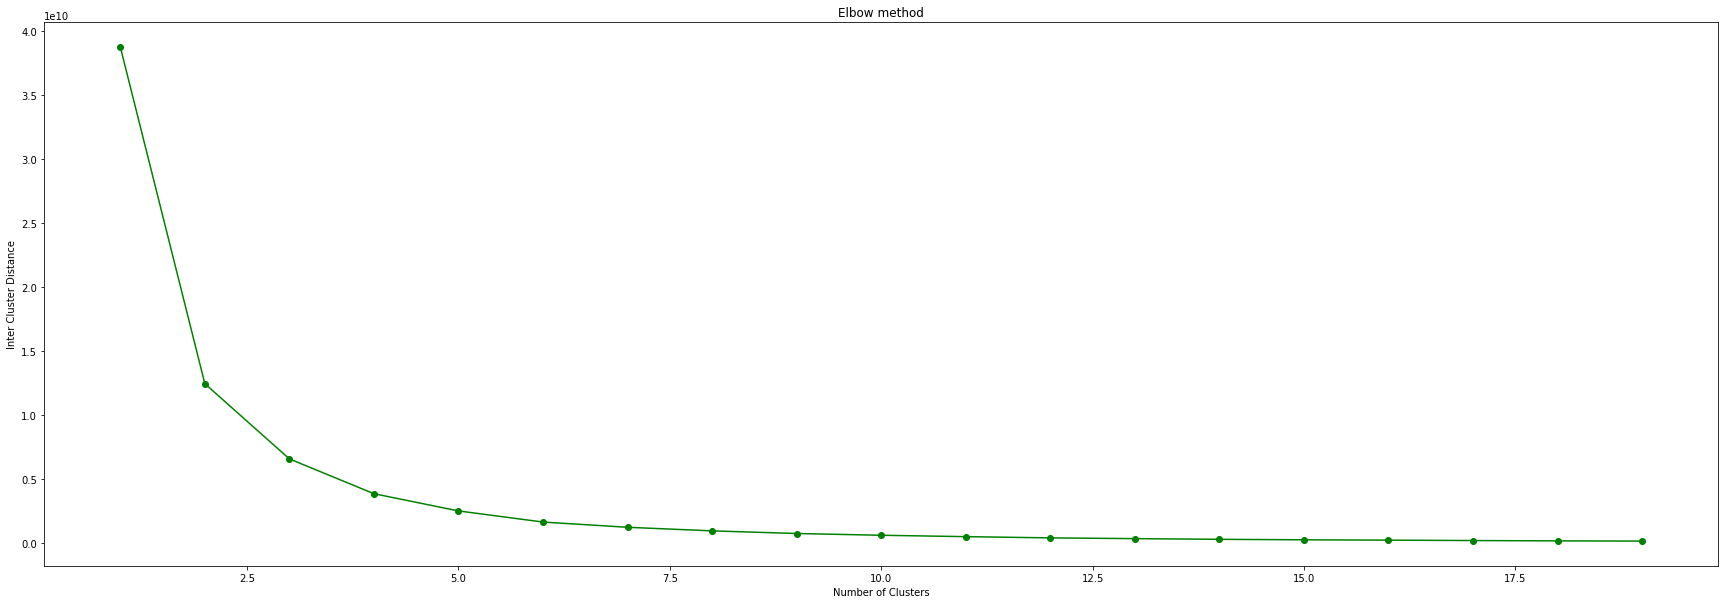

In [ ]:
kmeans_models = [KMeans(n_clusters=k, init ='k-means++', max_iter=300,random_state=42).fit(X) for k in range (1, 20)]
innertia = [model.inertia_ for model in kmeans_models]
    
#plotting the values
plt.figure(figsize=(30,10))
plt.plot(range(1, 20), innertia, marker='o', color='g')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()

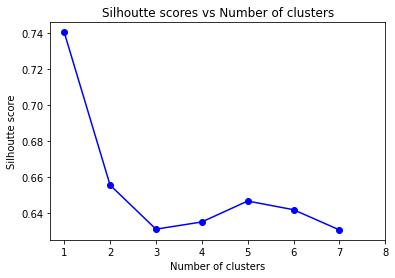

In [ ]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(X, model.labels_) for model in kmeans_models[1:8]]
plt.plot(range(1,8), silhoutte_scores, "bo-")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

Considering only BALANCE variable, we can choose k = 3

In [ ]:
km = KMeans(n_clusters = 3,init ='k-means++', max_iter=300,random_state=42)
km.fit(X)
y_balance_pred = km.predict(X)

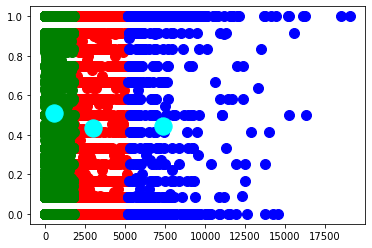

In [ ]:
plt.scatter(X[y_balance_pred==0, 0], X[y_balance_pred==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_balance_pred==1, 0], X[y_balance_pred==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_balance_pred==2, 0], X[y_balance_pred==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_balance_pred==3, 0], X[y_balance_pred==3, 1], s=100, c='green', label ='Cluster 4')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='cyan', label = 'Centroids')
plt.show()

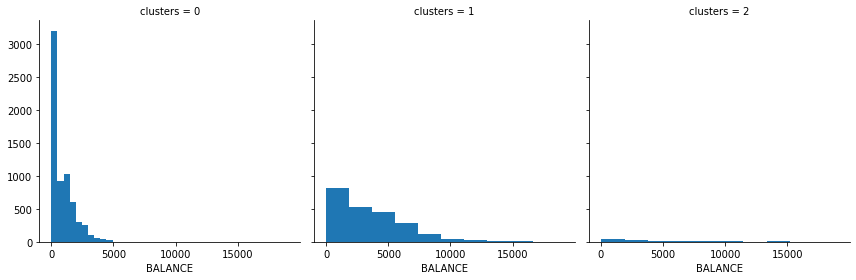

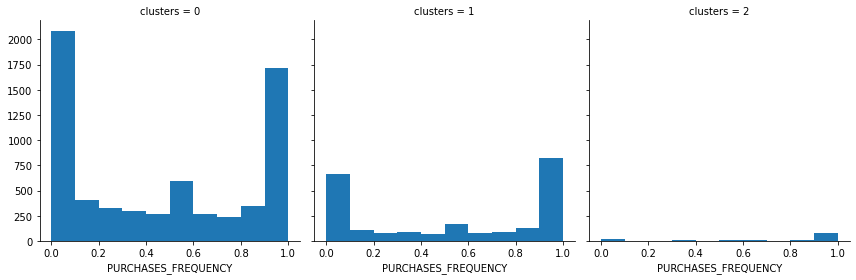

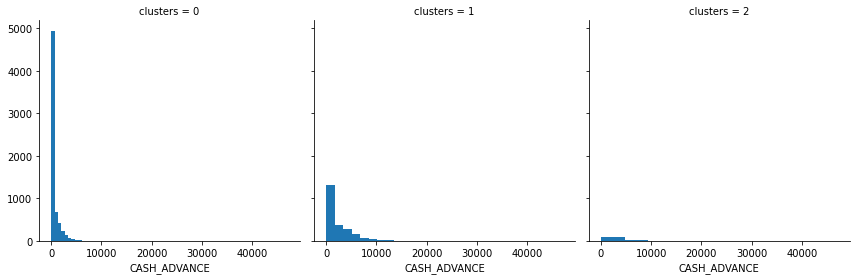

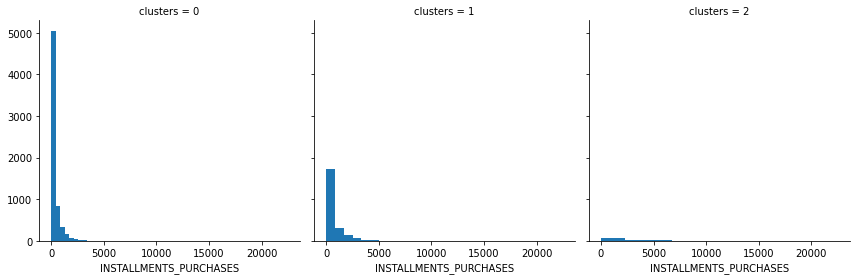

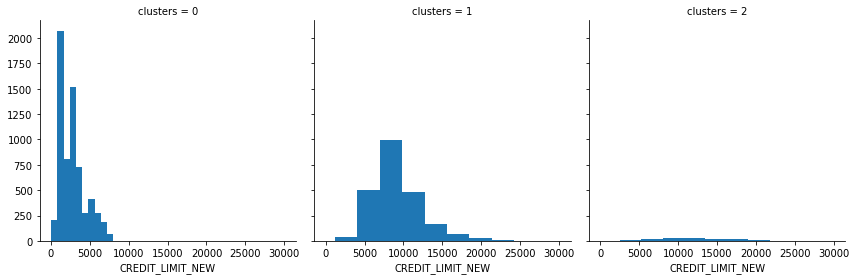

In [ ]:
cluster_df_1_viz = cluster_df[['BALANCE','PURCHASES_FREQUENCY','CASH_ADVANCE','INSTALLMENTS_PURCHASES','CREDIT_LIMIT_NEW','clusters']]

for c in cluster_df_1_viz.iloc[:,:-1]:
    grid= sns.FacetGrid(cluster_df_1_viz, col='clusters', height=4)
    grid.map(plt.hist, c)

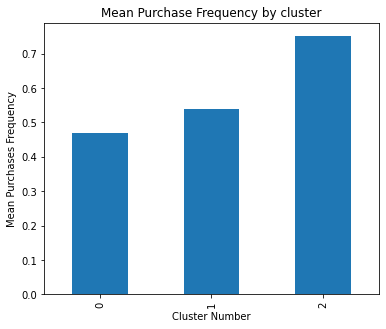

In [ ]:
dfg = cluster_df_1_viz.groupby('clusters')['PURCHASES_FREQUENCY'].mean()

dfg.plot(kind='bar', title='Mean Purchase Frequency by cluster', ylabel='Mean Purchases Frequency',
         xlabel='Cluster Number', figsize=(6, 5))

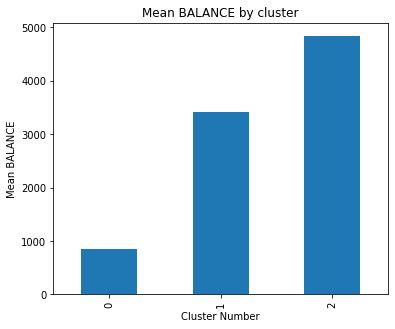

In [ ]:
dfg = cluster_df_1_viz.groupby('clusters')['BALANCE'].mean()

dfg.plot(kind='bar', title='Mean BALANCE by cluster', ylabel='Mean BALANCE',
         xlabel='Cluster Number', figsize=(6, 5))

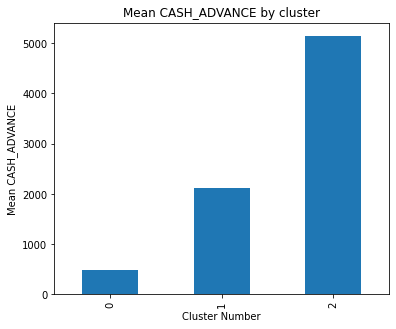

In [ ]:
dfg = cluster_df_1_viz.groupby('clusters')['CASH_ADVANCE'].mean()

dfg.plot(kind='bar', title='Mean CASH_ADVANCE by cluster', ylabel='Mean CASH_ADVANCE',
         xlabel='Cluster Number', figsize=(6, 5))

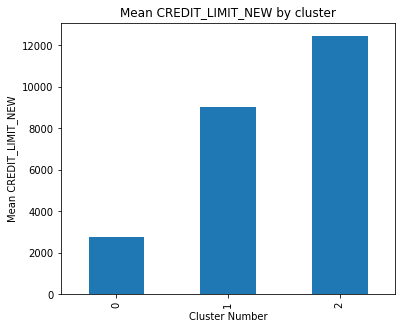

In [ ]:
dfg = cluster_df_1_viz.groupby('clusters')['CREDIT_LIMIT_NEW'].mean()

dfg.plot(kind='bar', title='Mean CREDIT_LIMIT_NEW by cluster', ylabel='Mean CREDIT_LIMIT_NEW',
         xlabel='Cluster Number', figsize=(6, 5))

# 3.2 DBSCAN :

DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density. K-Means is not capable of creating clusters of arbitary shape. This is were DBSCAN is helpful.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=2,min_samples=6)
dbscan.fit(train_df)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
dbscan_df = pd.DataFrame(train_df,columns = df.columns)
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS_NEW,CREDIT_LIMIT_NEW,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,201.802084,0.000000,12,139.509787,1000.0,-1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4103.032597,0.222222,12,1072.340217,7000.0,-1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,622.066742,0.000000,12,627.284787,7500.0,-1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,0.000000,12,312.343947,7500.0,-1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,678.334763,0.000000,12,244.791237,1200.0,-1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1400.057770,0.000000,12,2407.246035,1800.0,-1
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,6354.314328,1.000000,12,198.065894,13500.0,-1
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,679.065082,0.000000,12,532.033990,2300.0,-1
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,688.278568,0.000000,12,311.963409,7000.0,-1
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,1164.770591,0.000000,12,100.302262,11000.0,-1


In [ ]:
dbscan_df['clusters'].value_counts()

-1    8950
Name: clusters, dtype: int64

Here, using eps (minimum distance between two points) as 2 and minimum samples in a cluster as 6, we get 6 clusters with majority of them being in cluster 0

**Lets try to visualise using two variables like BALANCE and PURCHASES:**

In [ ]:
X = dbscan_df[['BALANCE','PURCHASES_FREQUENCY']].to_numpy()

In [ ]:
dbscan = DBSCAN(eps=0.075,min_samples=2)
dbscan.fit(X)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([  0,  -1,  -1, ...,  -1, 403,  -1])

In [ ]:
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df['clusters'].value_counts()

-1      7898
 152      23
 16       21
 8        15
 66       13
        ... 
 160       2
 158       2
 157       2
 156       2
 431       2
Name: clusters, Length: 433, dtype: int64

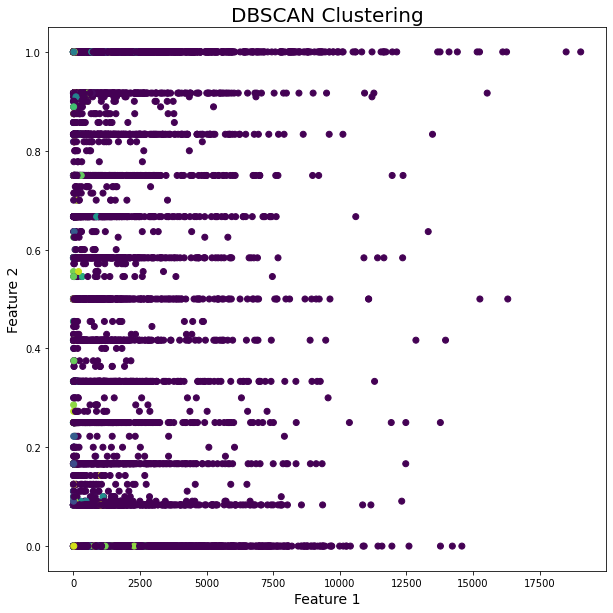

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(dbscan_df['BALANCE'],dbscan_df['PURCHASES_FREQUENCY'],c=dbscan_df['clusters'])
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# 3.3 Some differences that we observe in K-Means and DBSCAN are:

Clusters formed using K-Means are more or less spherical or convex in shape and must have same feature size. But using DBSCAN, arbitrary shaped clusters can be formed.

K-means clustering is more efficient for large datasets and K-means clustering is also sensitive to the number of clusters specified. Whereas in case of DBSCAN, no need to specify the number of clusters manually.

K-means Clustering does not work well with outliers and noisy datasets whereas DBSCAN works well with outlier.